In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

### CARGA DOS DADOS

In [2]:
df_pontuacao = pd.read_csv('./datasets/pontuacao_teste.csv')

In [3]:
df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [4]:
df_pontuacao.head(10)

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85
5,5.0,100
6,5.5,115
7,6.1,120
8,6.5,130
9,7.2,145


In [5]:
df_pontuacao.tail(10)

,horas_estudo,pontuacao_teste
91,44.9,750
92,45.1,755
93,45.3,760
94,45.5,765
95,45.7,770
96,46.0,780
97,46.2,785
98,46.4,790
99,46.6,795
100,46.9,800


### EDA

In [6]:
df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

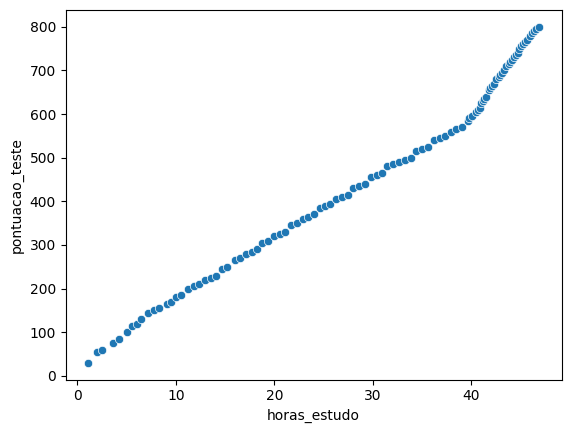

In [8]:
sns.scatterplot(data=df_pontuacao, x='horas_estudo', y='pontuacao_teste')

<Axes: ylabel='horas_estudo'>

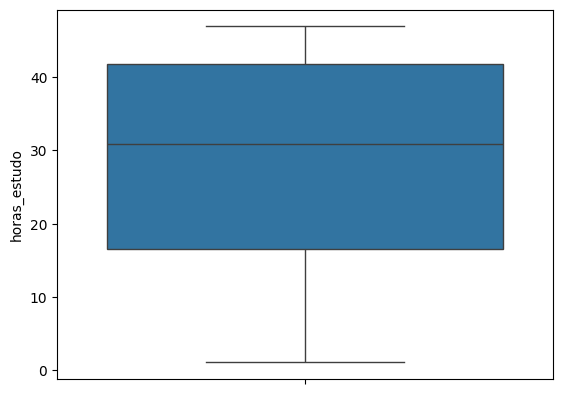

In [9]:
sns.boxplot(df_pontuacao, y='horas_estudo')

<Axes: ylabel='pontuacao_teste'>

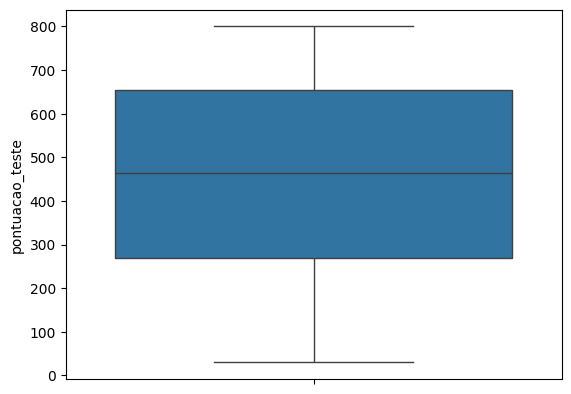

In [11]:
sns.boxplot(df_pontuacao, y='pontuacao_teste')

<Axes: >

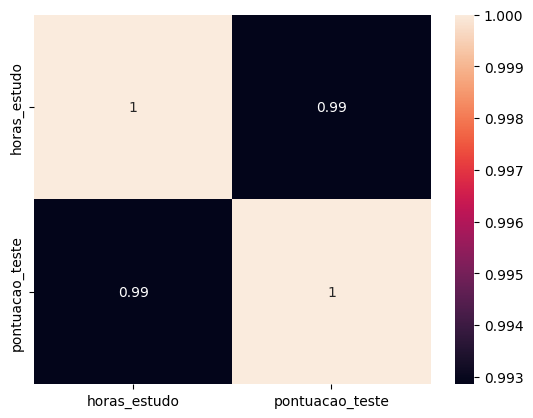

In [12]:
sns.heatmap(df_pontuacao.corr('pearson'), annot=True)

<Axes: >

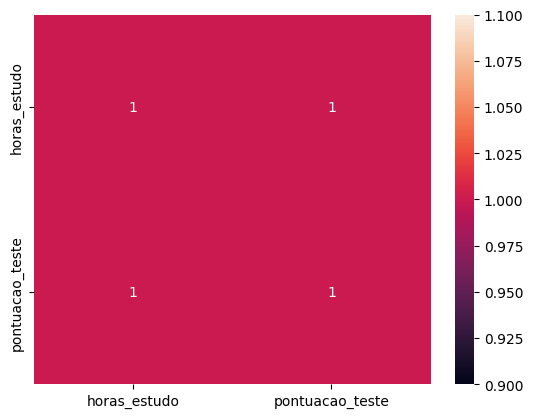

In [14]:
sns.heatmap(df_pontuacao.corr('spearman'), annot=True)

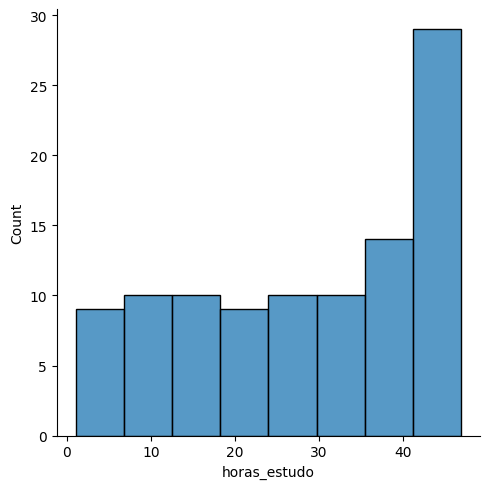

In [15]:
sns.displot(df_pontuacao, x='horas_estudo')

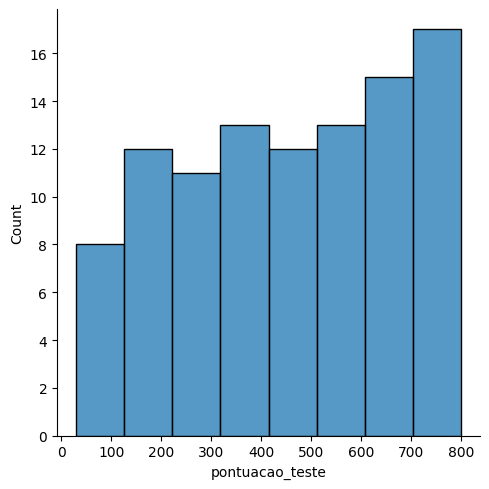

In [16]:
sns.displot(df_pontuacao, x='pontuacao_teste')

### TREINAR MODELO

In [17]:
X = df_pontuacao['horas_estudo'].values.reshape(-1, 1)
y = df_pontuacao['pontuacao_teste'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state= 50)

In [18]:
# Treinar modelo
reg_model = LinearRegression()

In [19]:
# Treinar o modelo
reg_model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Imprimir a equação da reta
print("A equação da reta é y = {:4f}x + {:4f}".format(reg_model.coef_[0][0], reg_model.intercept_[0]))

A equação da reta é y = 15.642619x + 8.476601


### Validação modelo - métricas

In [22]:
# Predição dos valores com base no conjunto de testes
y_pred = reg_model.predict(X_test)

### Comparar y_pred (valores preditos) com y_test (valores reais)

In [24]:
# Calcular  métrica R-squared ou Coeficiente de Determinação
# R2 representa a proporção da variação na variável dependente que é explicada pela variável independente
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_score(y_test, y_pred)

0.9828400452912442

In [26]:
# Calcular métrica MAE (Mean Absolute Error)
# MAE = Média entre y_test - t_pred
# É uma métrica fácil de de interpretar
# MAE é menos sensível a outliers
mean_absolute_error(y_test, y_pred)

np.float64(22.957470277134636)

In [27]:
# Calcular MSE (Mean Squared Error)
# MSE = Média (y_test - y_pred)^2
# Não é uma métrica fácil de interpretar
# MSE é mais sensível a outliers e penaliza grandes erros
mean_squared_error(y_test, y_pred)

np.float64(766.9972992416428)

In [28]:
# CALCULAR RMSE = RAIZ (MÉDIA (Y_TEST - Y_PRED) ^ 2)
mean_squared_error(y_test, y_pred, squared=False)

/Users/brunoramoslemos/.local/share/virtualenvs/regressao_linear_simples-LwdU3eQy/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


np.float64(27.694716088843425)

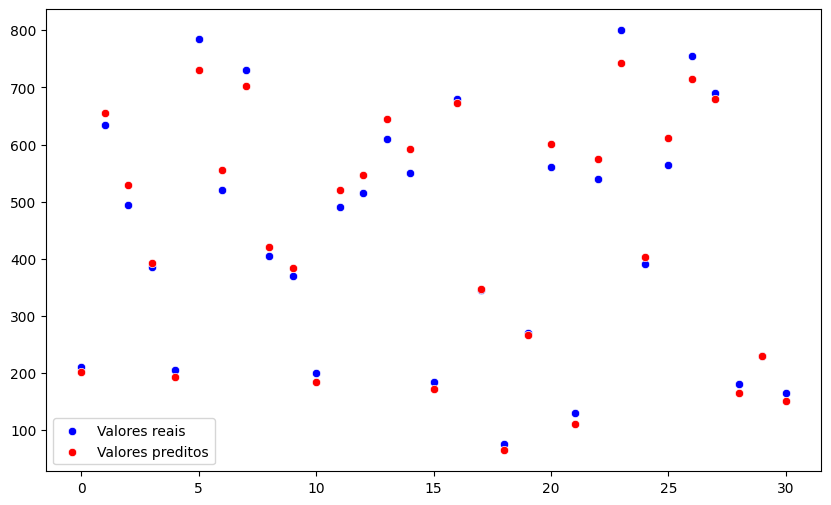

In [29]:
x_axix = range(len(y_test))
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_axix, y=y_test.reshape(-1), color='blue', label="Valores reais")
sns.scatterplot(x=x_axix, y=y_pred.reshape(-1), color='red', label="Valores preditos")
plt.legend()
plt.show()

### Análise de Redíduos

In [30]:
# Residuos são as diferenças entre os y_test e y_pred
residuos = y_test - y_pred

In [31]:
# Calcular os resíduos padronizados
from scipy.stats import zscore
residuos_std = zscore(residuos)

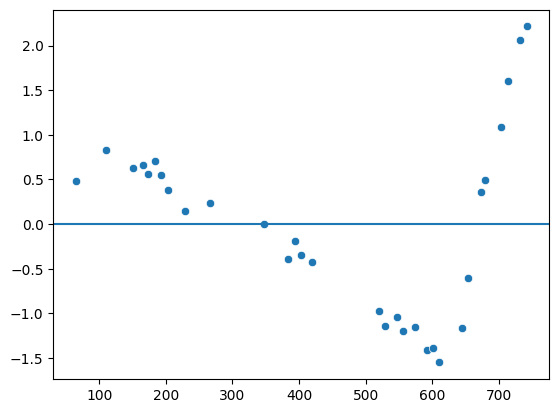

In [32]:
# Verificar linearidade do modelo
# Se os resíduos estiverem entre -2 e +2 (na escala padrão), indica linearidade
# Verificar homogeneidade das variâncias (homocedasticidade)
# Valores estiver em torno da reta, temos homocedasticidade, caso contrário, se tivermos alguma tendência ou padrão
# (formam um cone, funil), há heterocedasticidade
sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1))
plt.axhline(y=0)

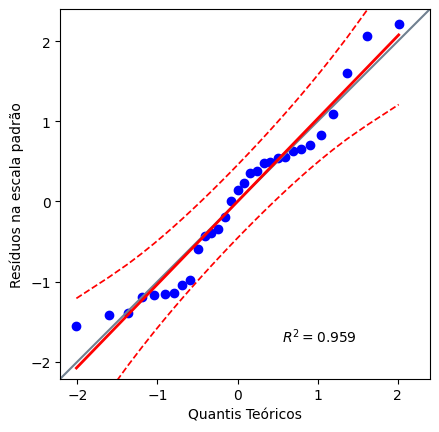

In [33]:
# Checar se resíduos seguem uma distribuição normal
# QQ (Quantile-Quantile) Plot
import pingouin as pg
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala padrão')
plt.show()


In [34]:
# Teste de normalidade - Shapiro Wilk
# H0 - Segue distribuição normal
# H1 - Não segue distribuição normal
# Se o p-valor > 0.05 não rejeita H0, caso contrário rejeitamos.
stat_shapiro, p_valor_shapiro = shapiro(residuos.reshape(-1))
print("Estatística do teste:  {} e P-Valor: {}".format(stat_shapiro, p_valor_shapiro))

Estatística do teste:  0.950053222616176 e P-Valor: 0.15663817850305037


In [36]:
# Teste de normalidade - Kolmogorov-Smirnov
# H0 - Segue distribuição normal
# H1 - Não segue distribuição normal
# Se o p-valor > 0.05 não rejeita H0, caso contrário rejeitamos.
stat_ks, p_valor_ks = kstest(residuos.reshape(-1), 'norm')
print("Estatística do teste:  {} e P-Valor: {}".format(stat_ks, p_valor_ks))

Estatística do teste:  0.4835580845051284 e P-Valor: 3.3953689958140517e-07


### Fazer predições com o modelo

In [37]:
# Se eu estudar 30.4 horas, qual a pontuação prevista pelo modelo
reg_model.predict([[30.4]])

array([[484.01220436]])

In [38]:
# Quantas horas de estudo para obter 600 pontos
(600 - reg_model.intercept_[0]) / reg_model.coef_[0][0]

np.float64(37.81485802710669)

### Salvar modelo para usar depois

In [39]:
import joblib
joblib.dump(reg_model, './modelo_regressao.pkl')

['./modelo_regressao.pkl']

### Disponibilizar modelo em API